In [14]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th
import os

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [15]:
trial_name = "github"

In [16]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob(f"{trial_name}_trial/cali/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 11/11 [00:00<00:00, 30.54it/s]


View Calltree

In [17]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.000 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
0.000 MPI_Recv
0.000 MPI_Send
1.371 whole_function
├─ 0.020 MPI_Barrier
├─ 0.000 MPI_Init
├─ 0.004 MPI_Isend
├─ 0.372 MPI_Recv
├─ 0.008 array_creation
└─ 0.032 sort_validation
   ├─ 0.000 MPI_Isend
   ├─ 0.000 MPI_Recv
   └─ 0.030 MPI_Reduce

Legend (Metric: Avg time/rank Min: 0.00 Max: 1.37 indices: {'profile': 113934282})
█ 1.23 - 1.37
█ 0.96 - 1.23
█ 0.69 - 0.96
█ 0.41 - 0.69
█ 0.14 - 0.41
█ 0.00 - 0.14

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `array_size` in the Thicket metadata table.

In [18]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("array_size")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "array_size"]).sort_index()

tk.dataframe.head()

profile  \
node                                         num_procs array_size               
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536        242151409   
                                                       524288      1302723734   
                                                       4194304      395006077   
                                             4         65536       2546934099   
                                                       524288      1045563748   

                                                                    nid  \
node                                         num_procs array_size         
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536       19.0   
                                                       524288      19.0   
                                                       4194304     19.0   
                                             4         65536       19.0   
                                                       524288      19.0   

                                                                    spot.channel  \
node                                         num_procs array_size                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536       regionprofile   
                                                       524288      regionprofile   
                                                       4194304     regionprofile   
                                             4         65536       regionprofile   
                                                       524288      regionprofile   

                                                                   Min time/rank  \
node                                         num_procs array_size                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536            0.000113   
                                                       524288           0.000120   
                                                       4194304          0.000126   
                                             4         65536            0.000339   
                                                       524288           0.000503   

                                                                   Max time/rank  \
node                                         num_procs array_size                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536            0.000122   
                                                       524288           0.000133   
                                                       4194304          0.000145   
                                             4         65536            0.000366   
                                                       524288           0.000531   

                                                                   Avg time/rank  \
node                                         num_procs array_size                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536            0.000117   
                                                       524288           0.000126   
                                                       4194304          0.000135   
                                             4         65536            0.000355   
                                                       524288           0.000523   

                                                                   Total time  \
node                                         num_procs array_size               
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536         0.000235   
                                                       524288        0.000253   
                                                       4194304       0.000270   
                                             4         65536         0.001419   
                                                       524288        0.002091   

                                                    

In [19]:
# Define common variables
array_sizes = [65536, 524288, 4194304]
if trial_name == "my":
    processes = [2, 4, 8, 16, 32, 64]
else:
    processes = [2, 4, 8, 16]


In [20]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [21]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7),
        logy=True
    )    
    plot.set_xscale('log', base=2)
    plot.set_yscale('log', base=8)
    plt.show()
    return plot

Total time graphs

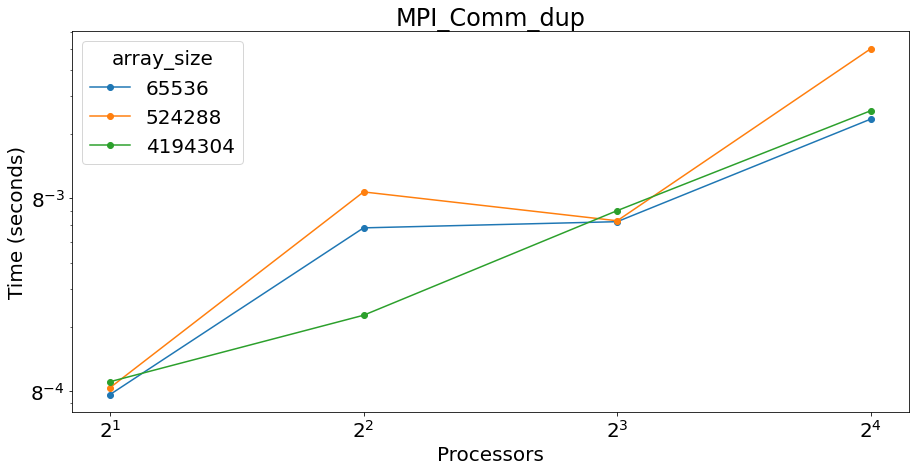

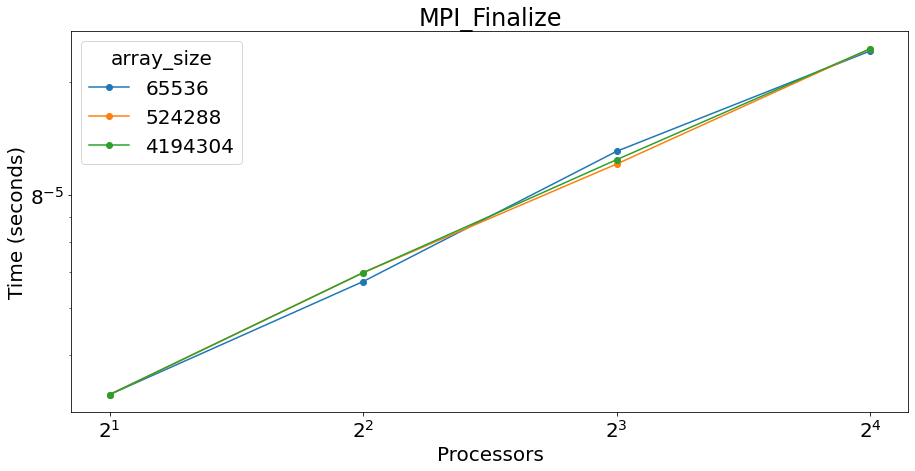

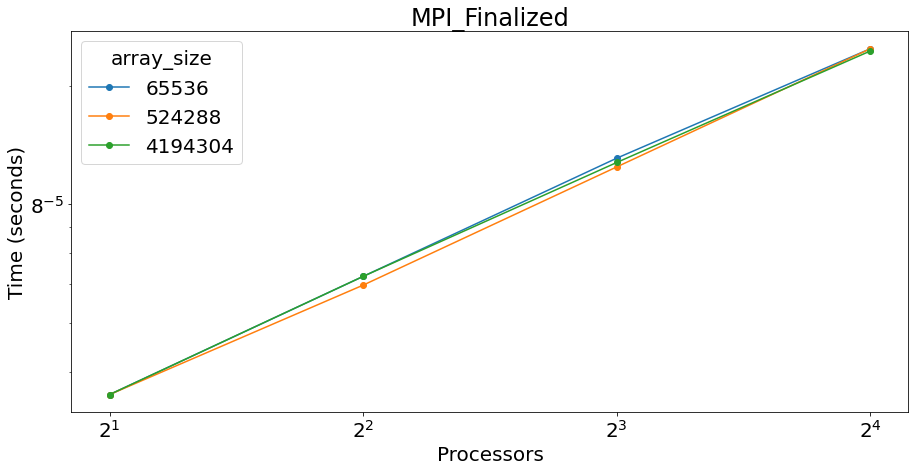

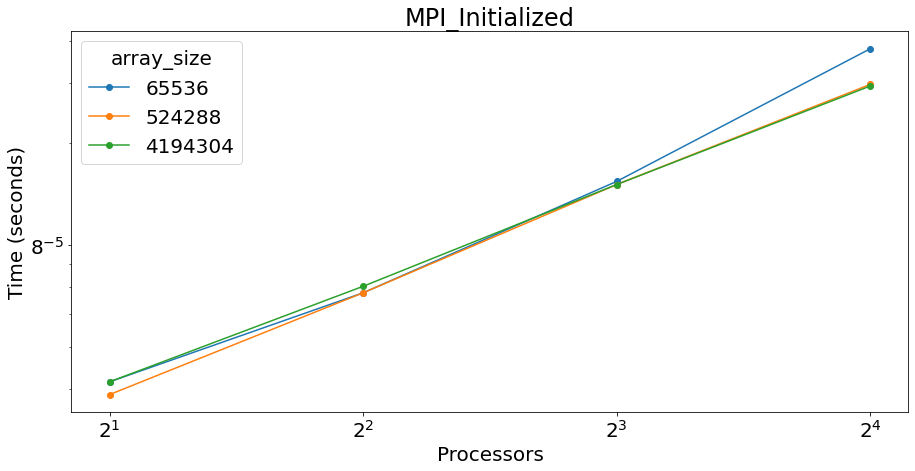

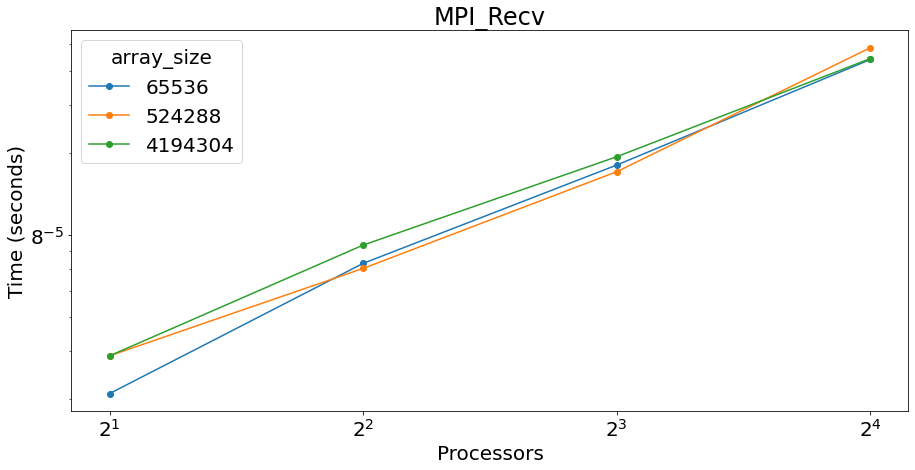

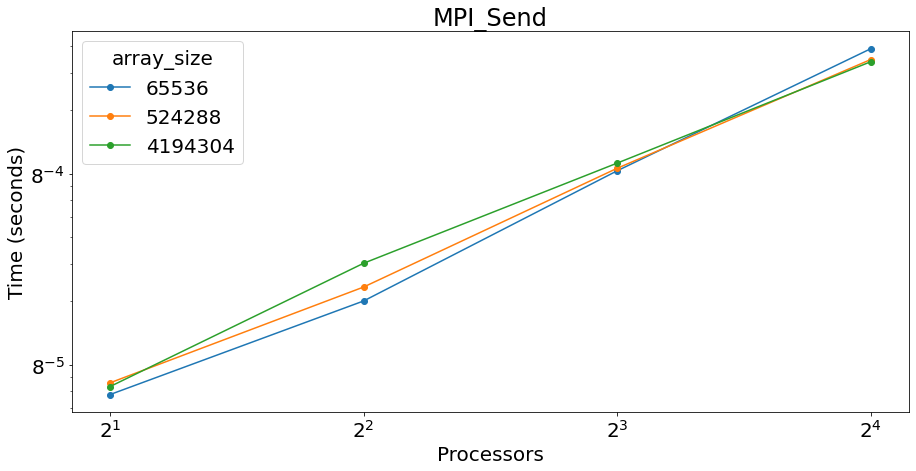

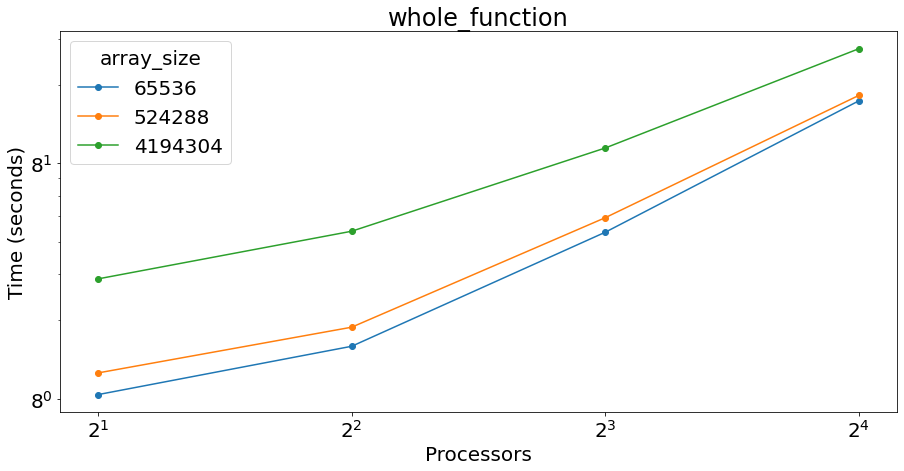

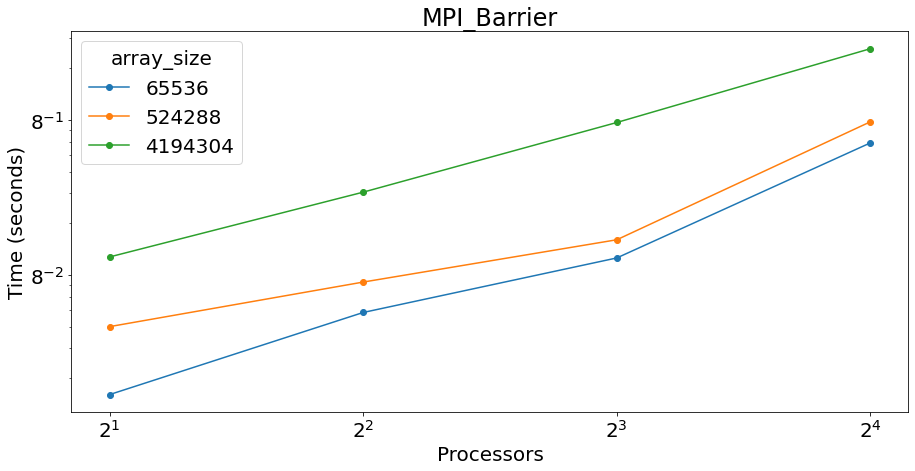

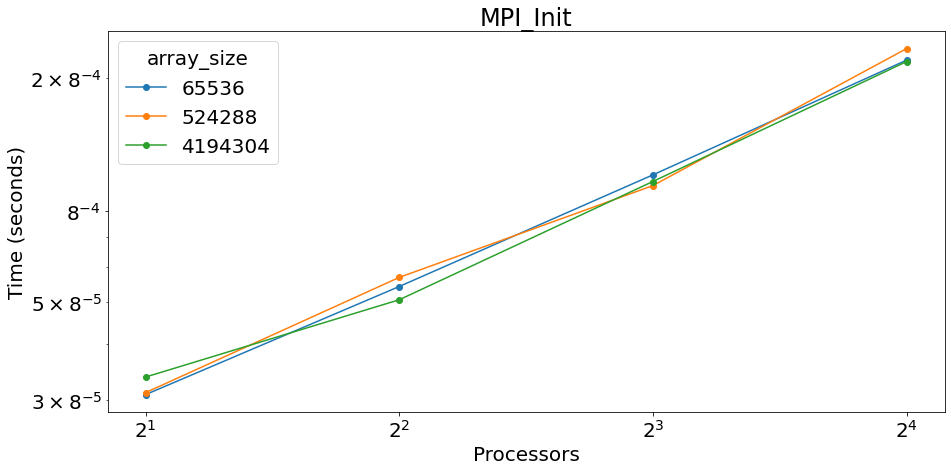

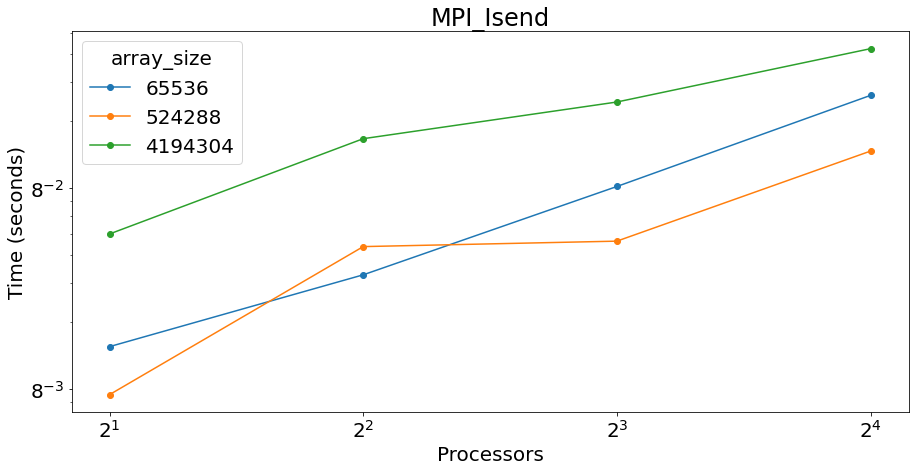

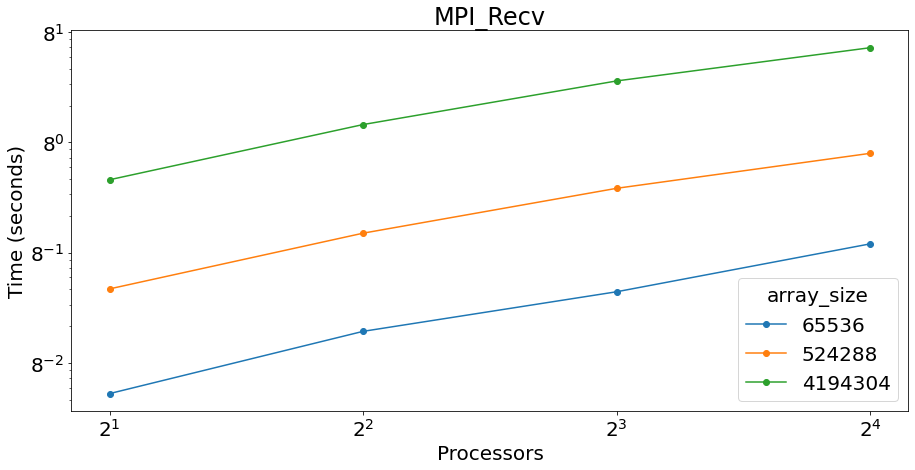

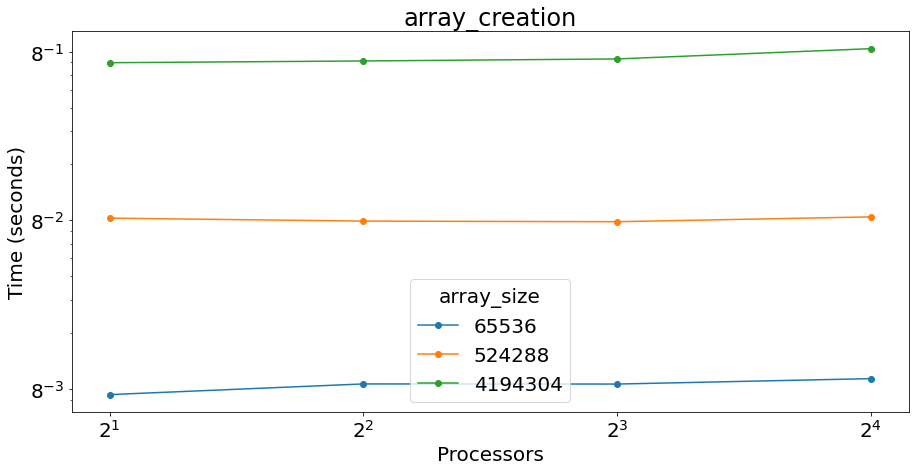

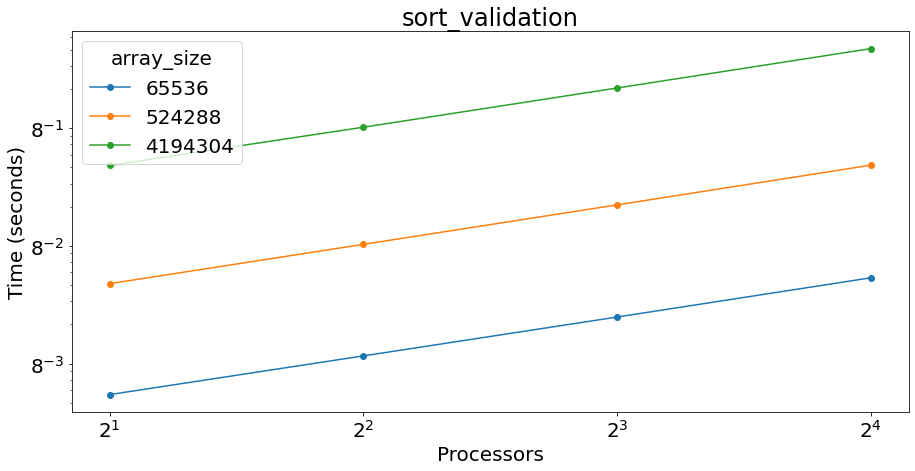

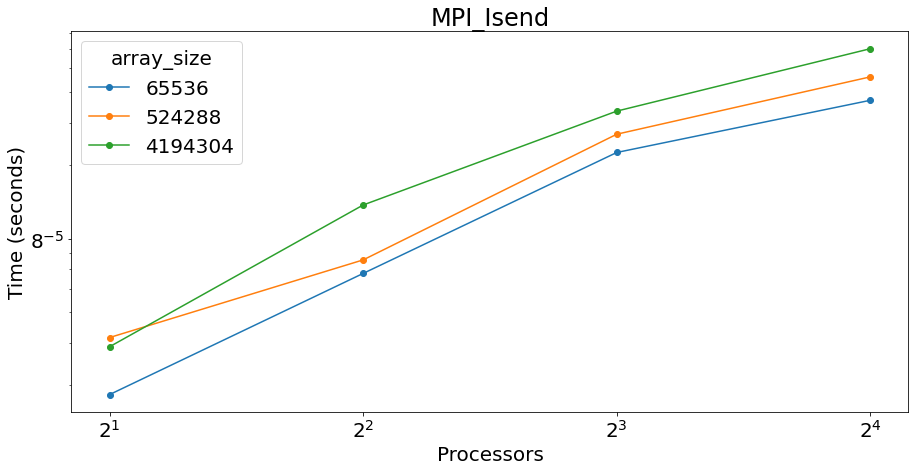

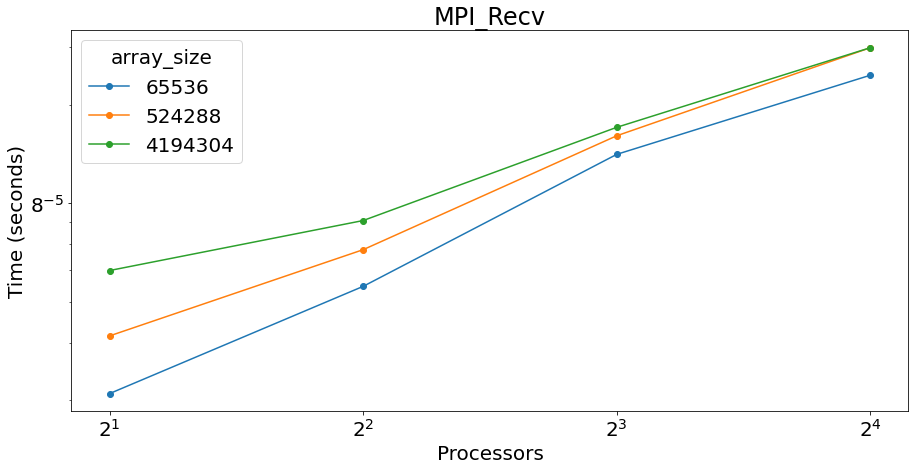

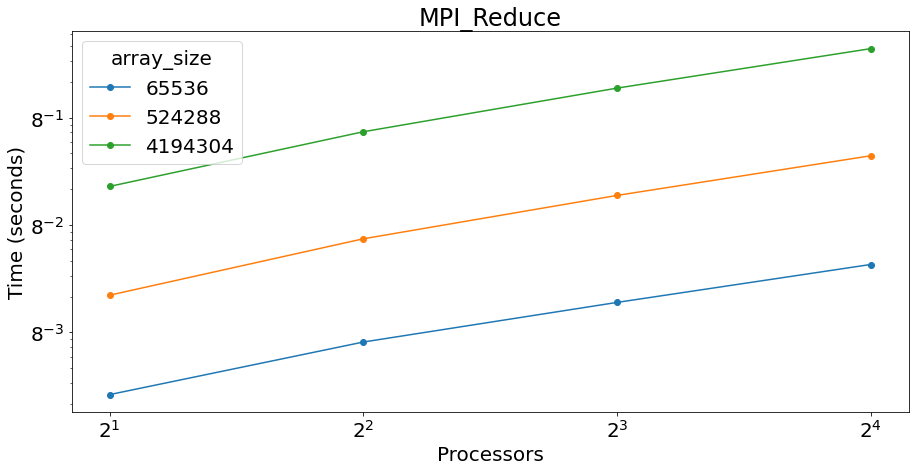

In [22]:
for node in tk.graph.traverse():
    plot_pandas(
        df=tk.dataframe.loc[node, "Total time"].unstack(level="array_size"),
        title=node.frame["name"],
        xlabel="Processors",
        ylabel="Time (seconds)",
    )

Max time graphs

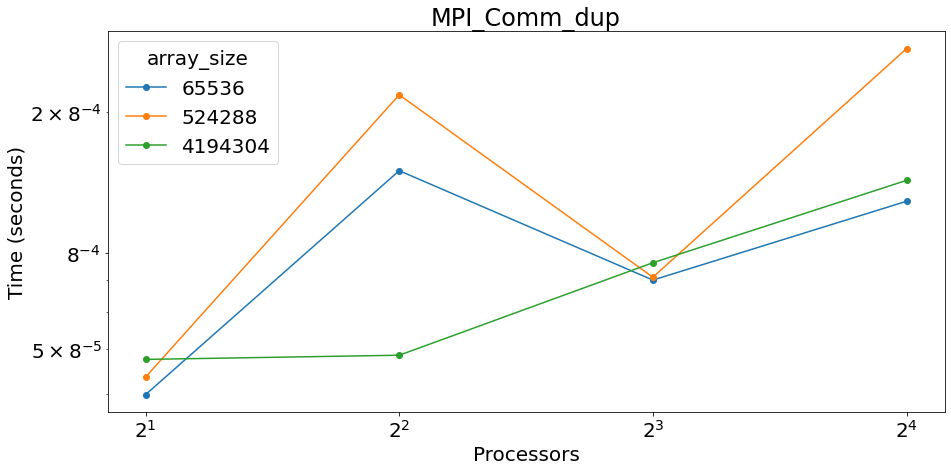

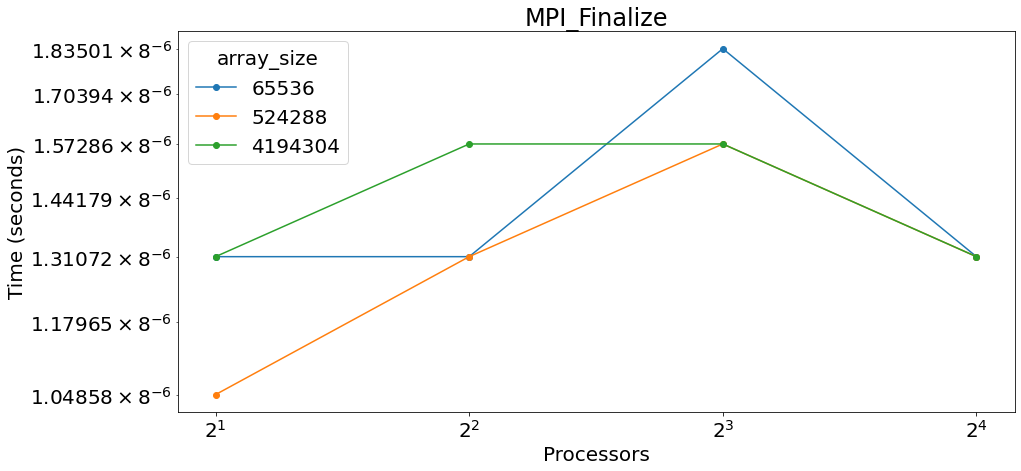

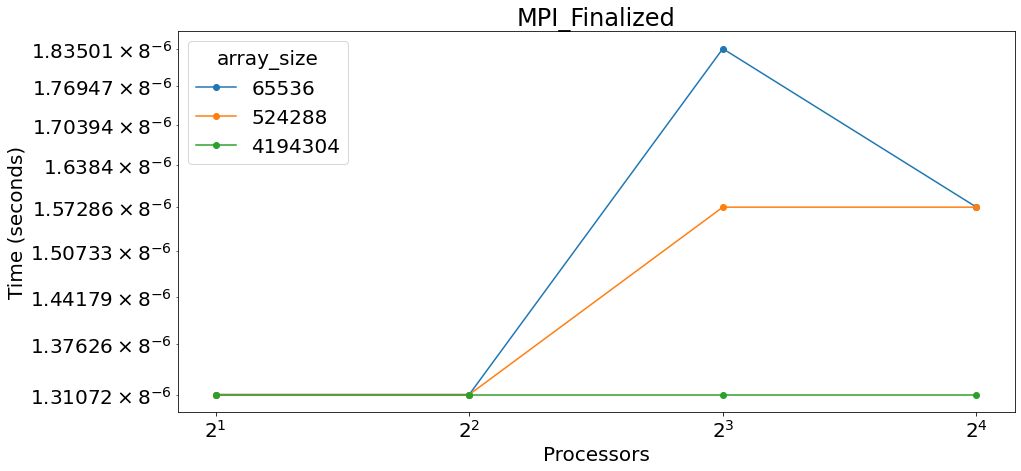

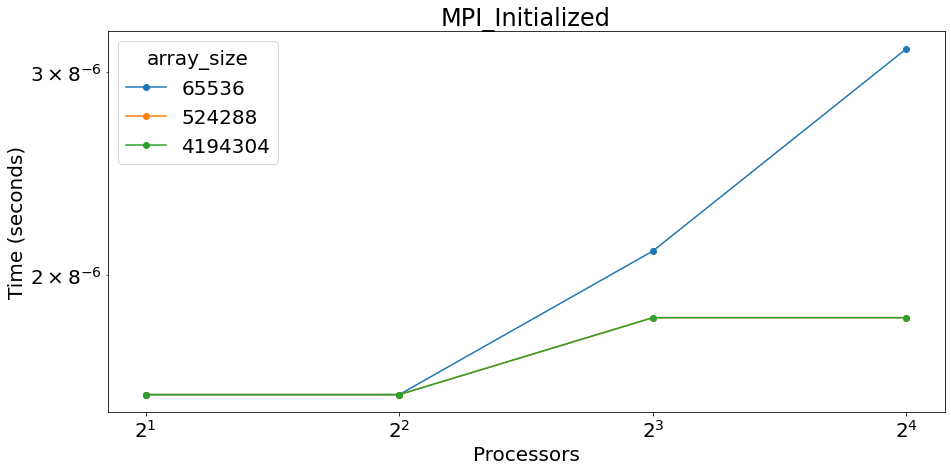

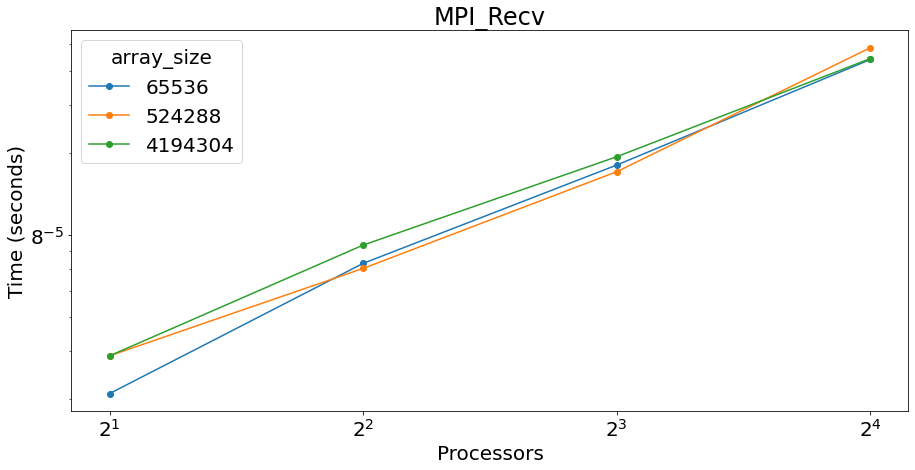

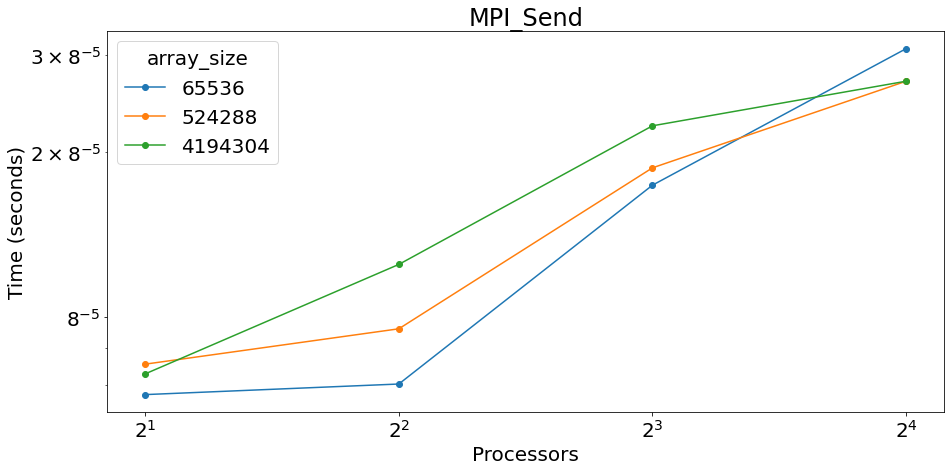

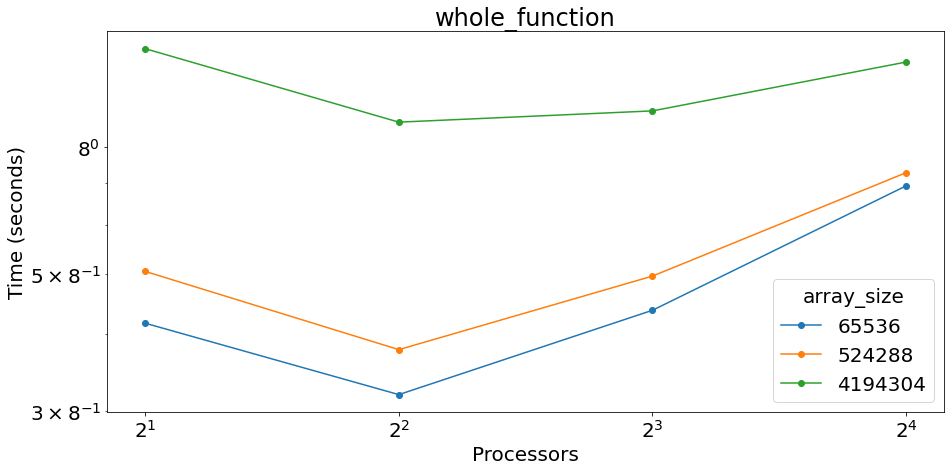

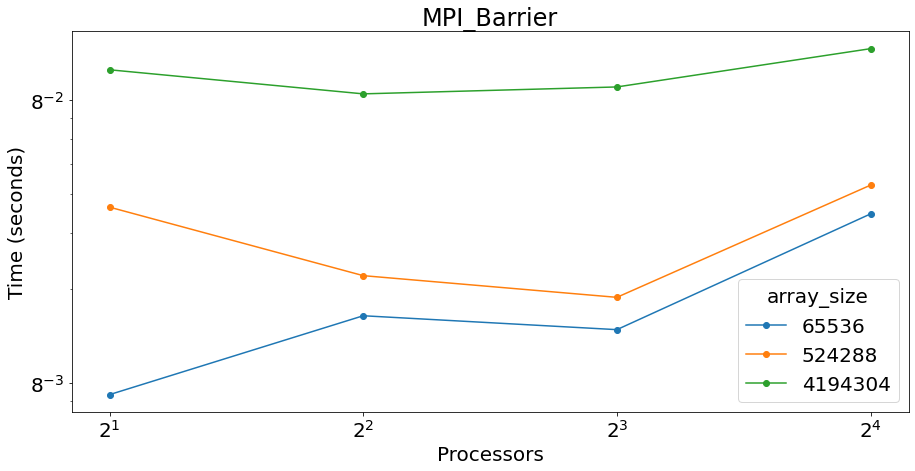

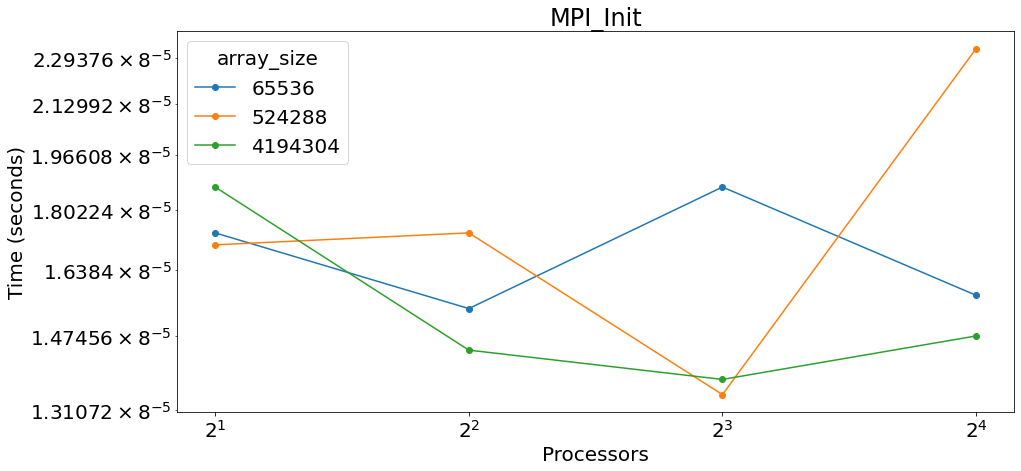

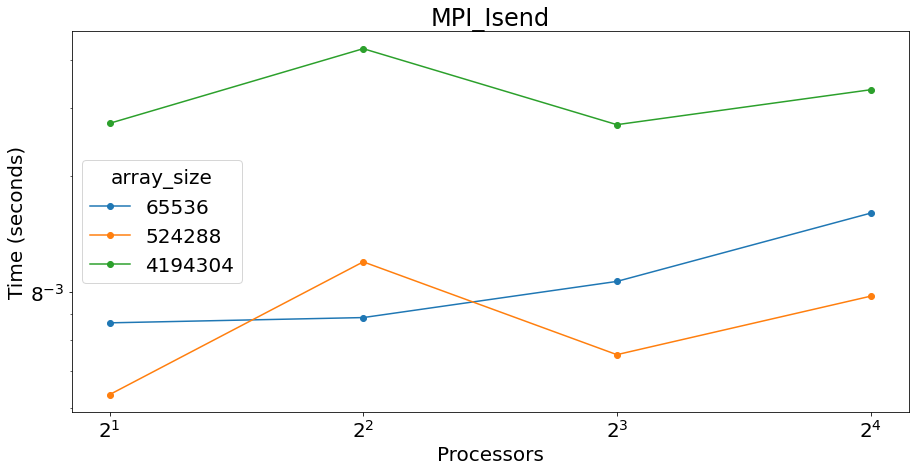

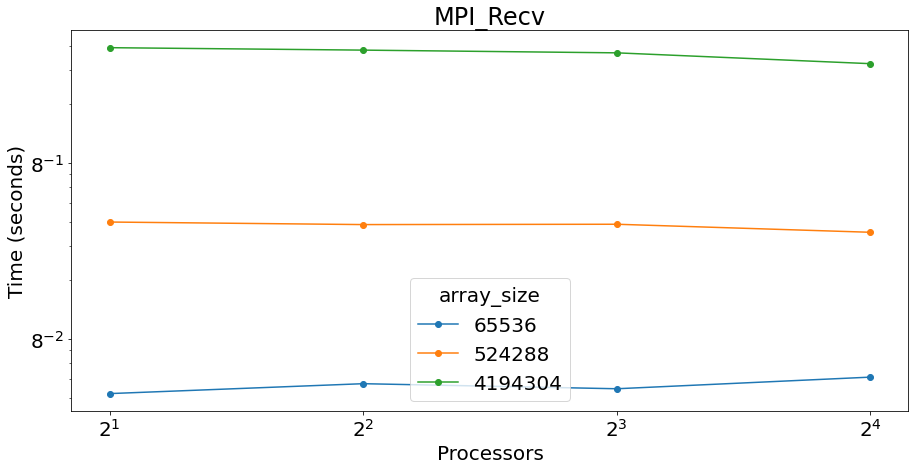

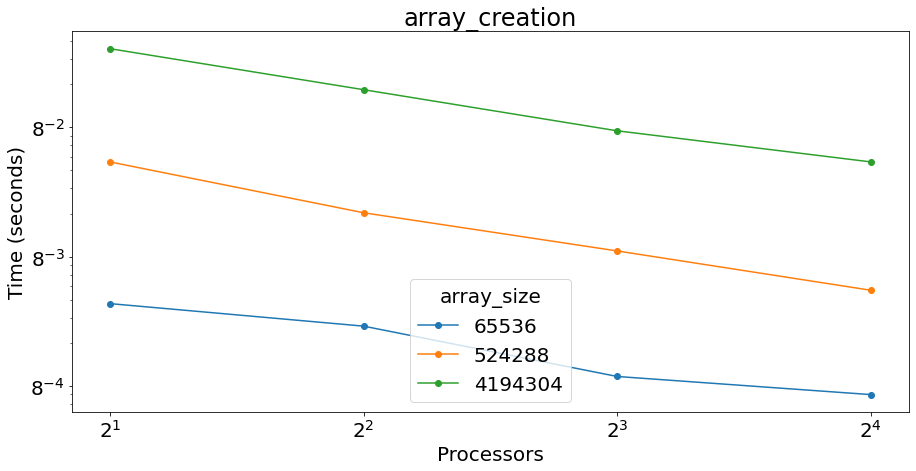

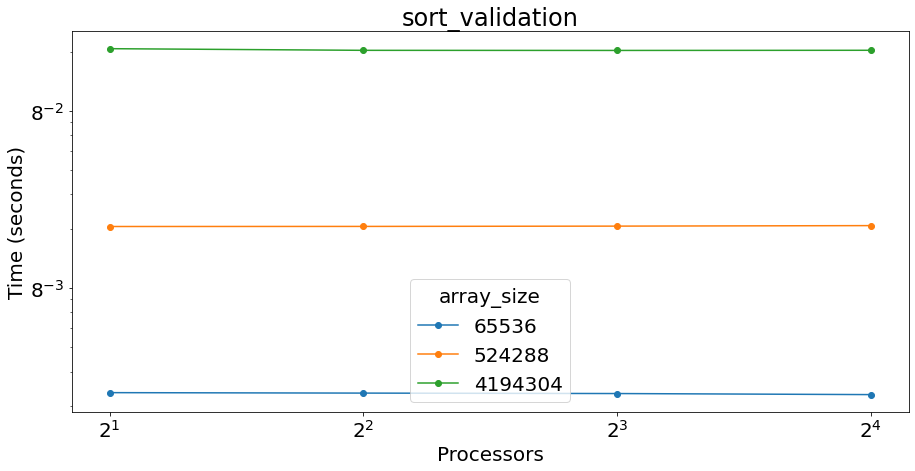

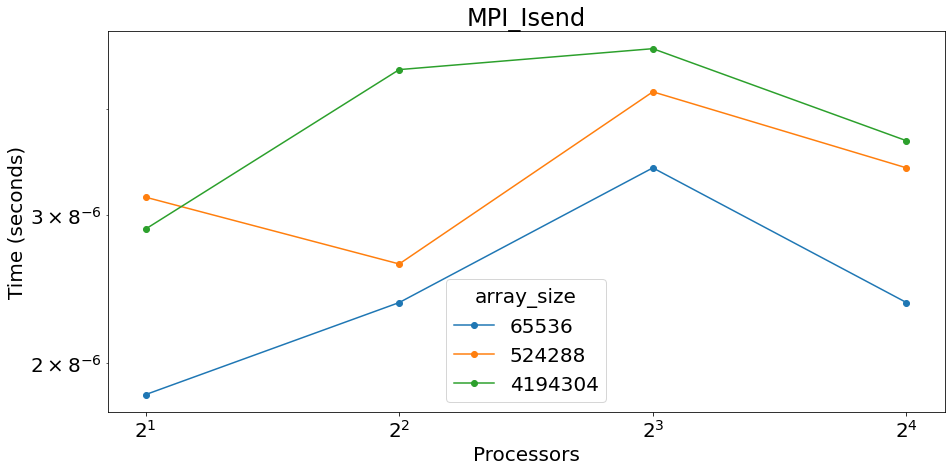

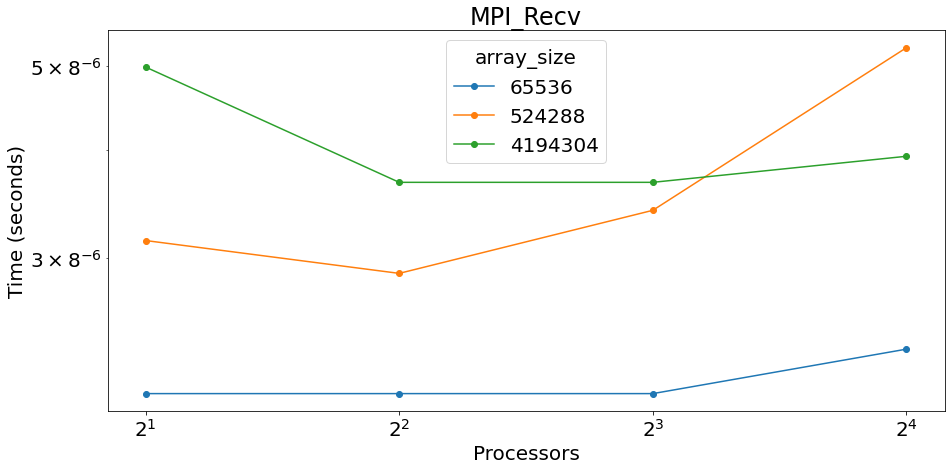

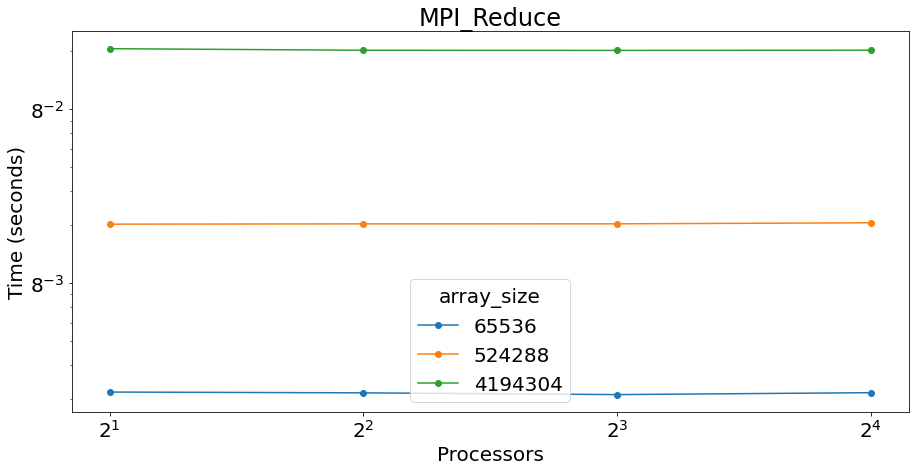

In [23]:
for node in tk.graph.traverse():
    plot_pandas(
        df=tk.dataframe.loc[node, "Max time/rank"].unstack(level="array_size"),
        title=node.frame["name"],
        xlabel="Processors",
        ylabel="Time (seconds)",
    )

Min time graphs

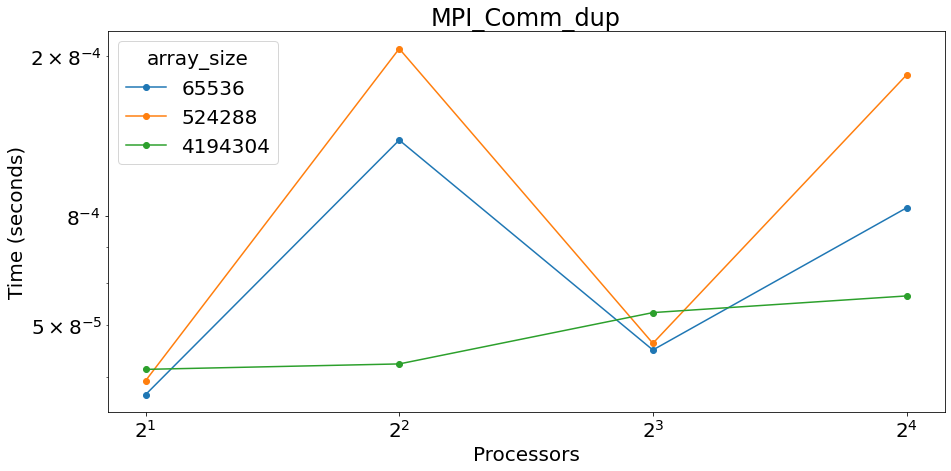

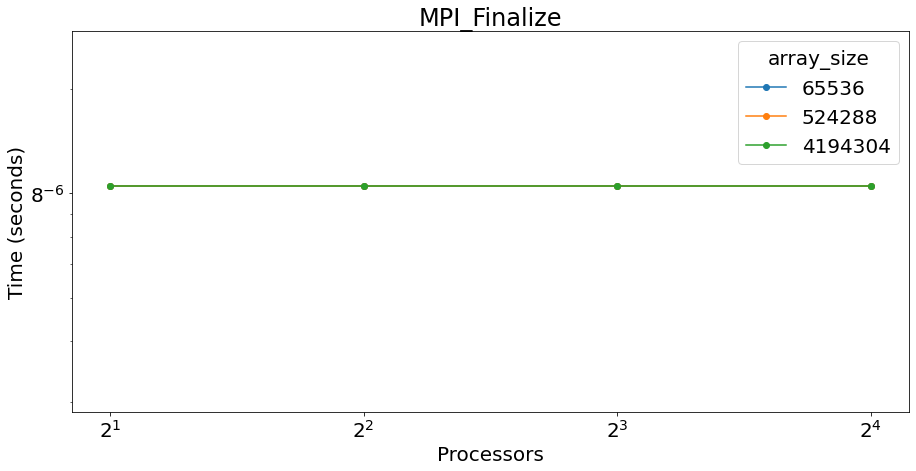

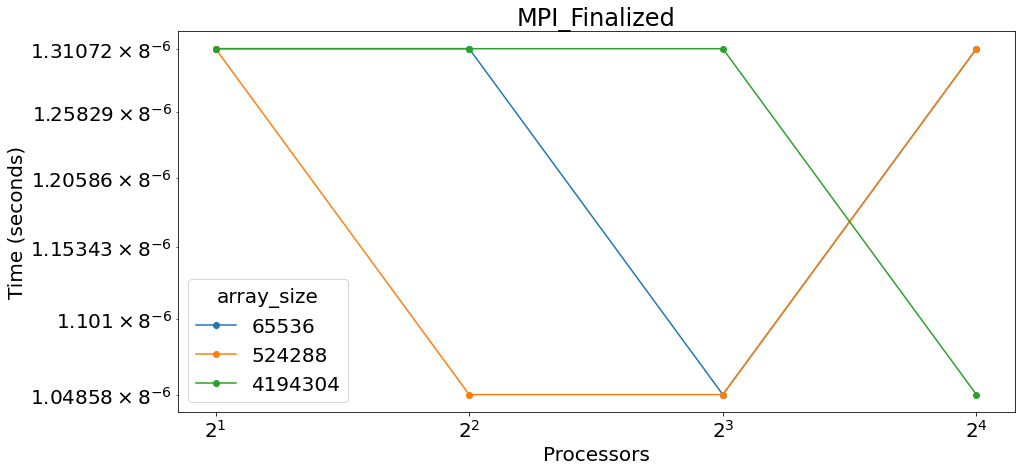

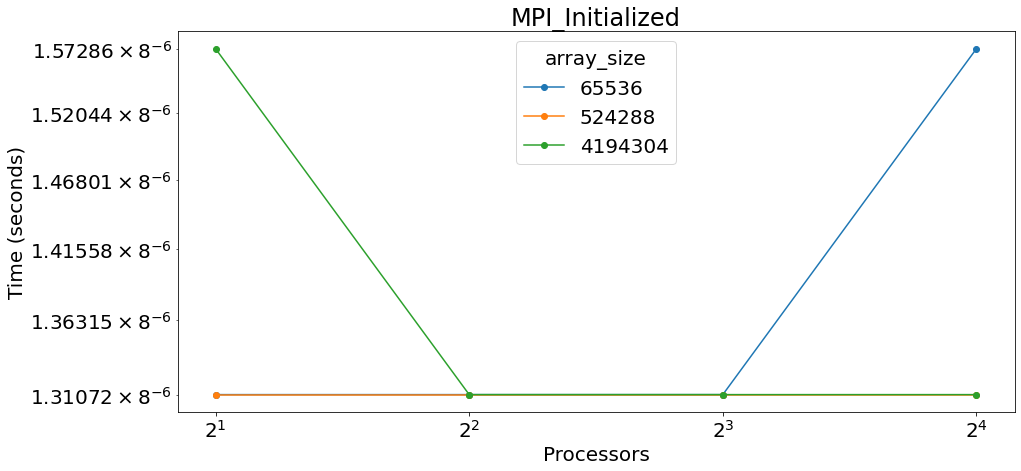

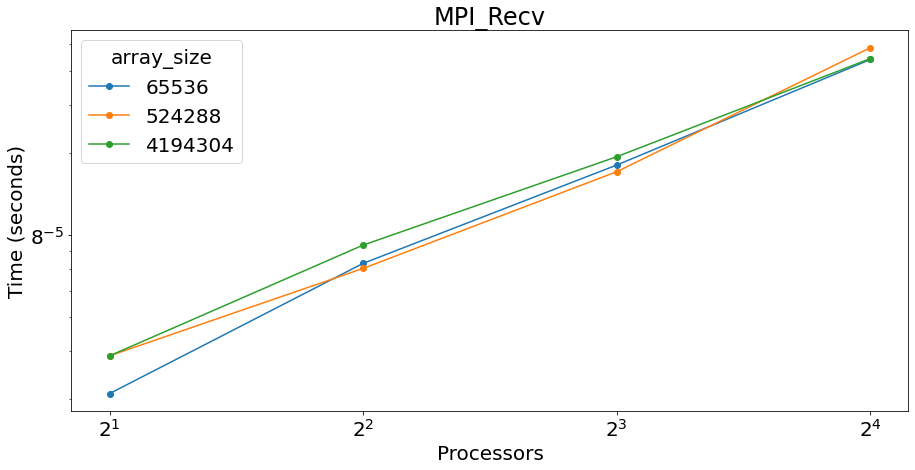

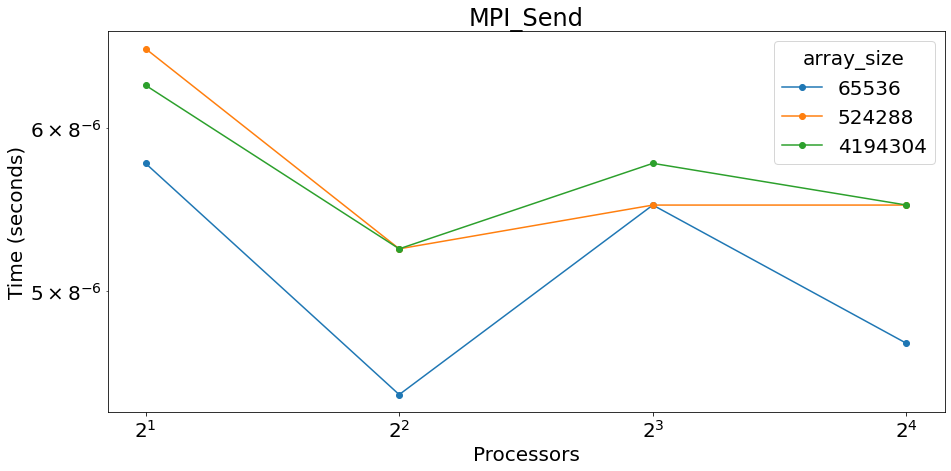

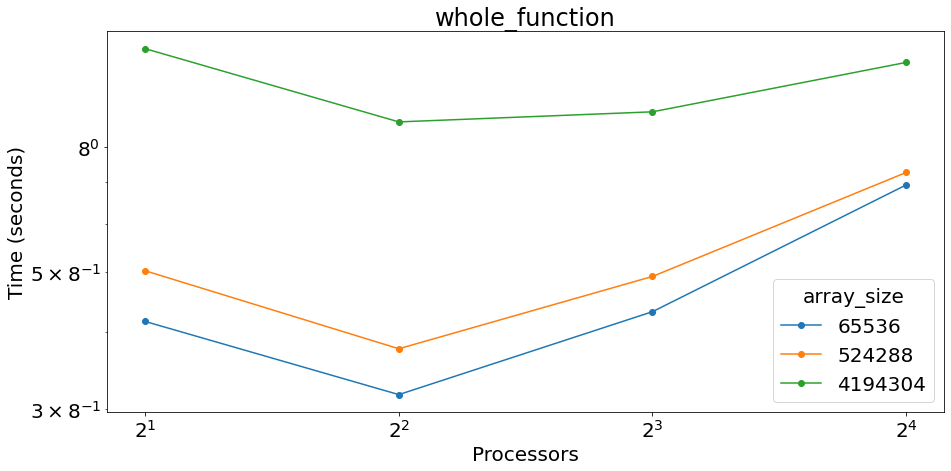

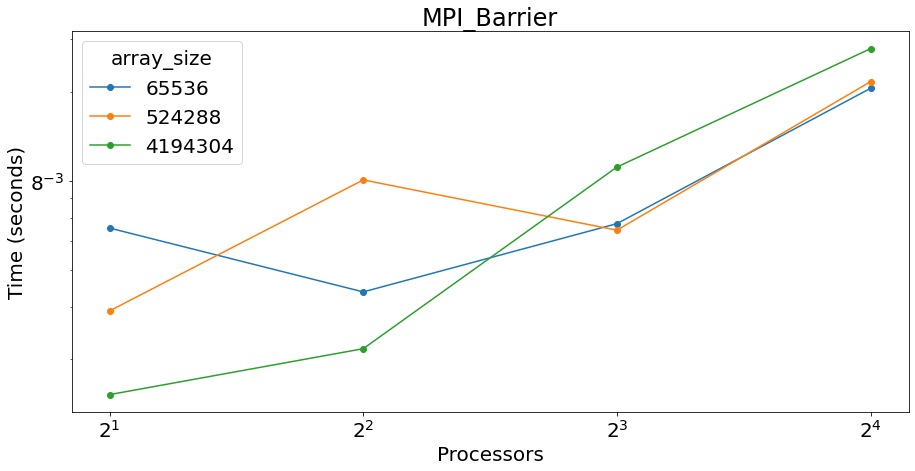

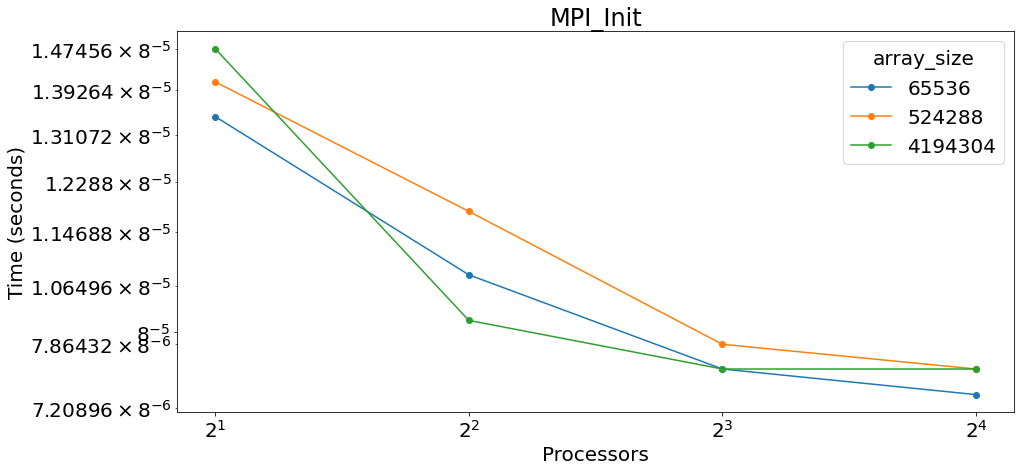

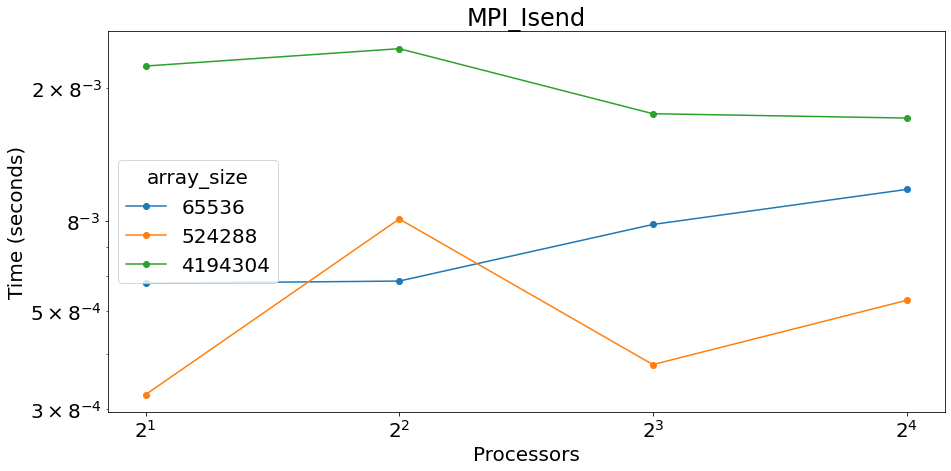

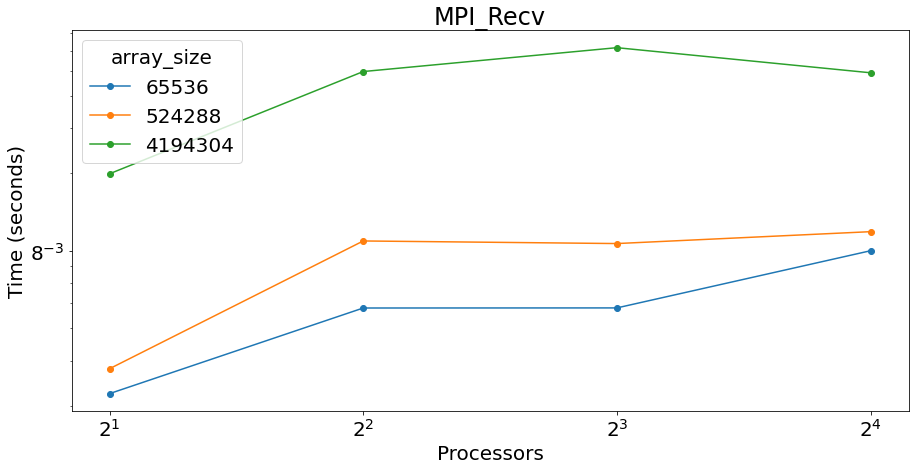

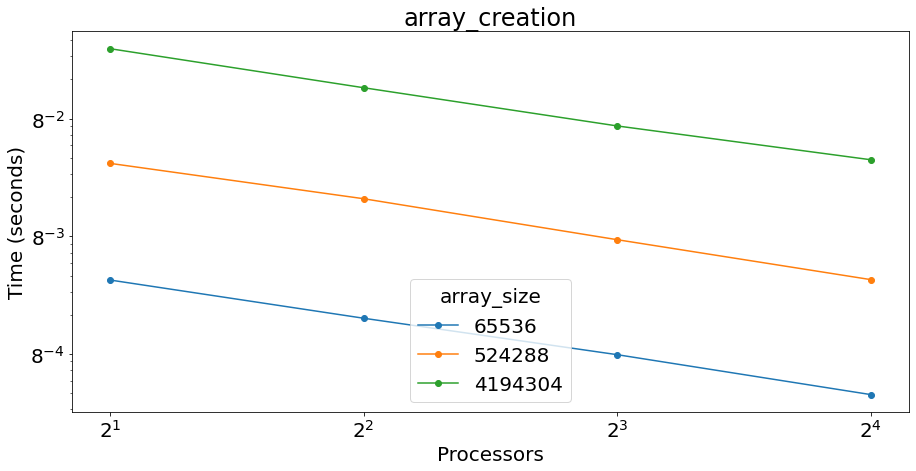

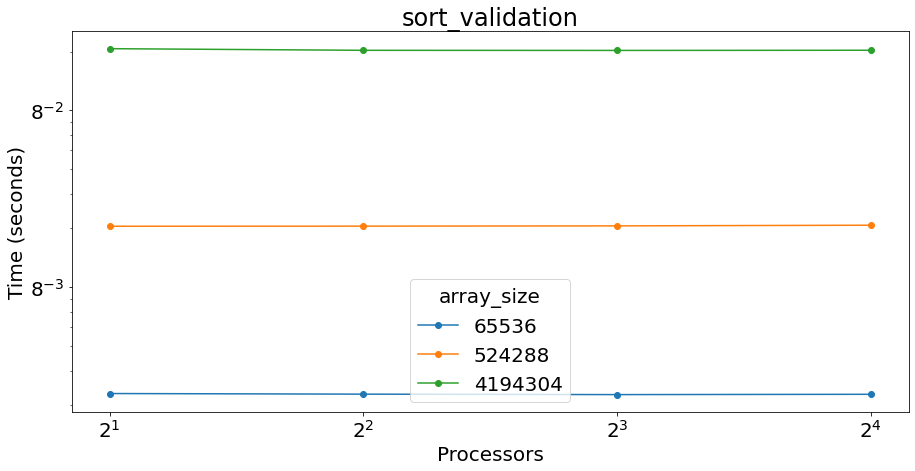

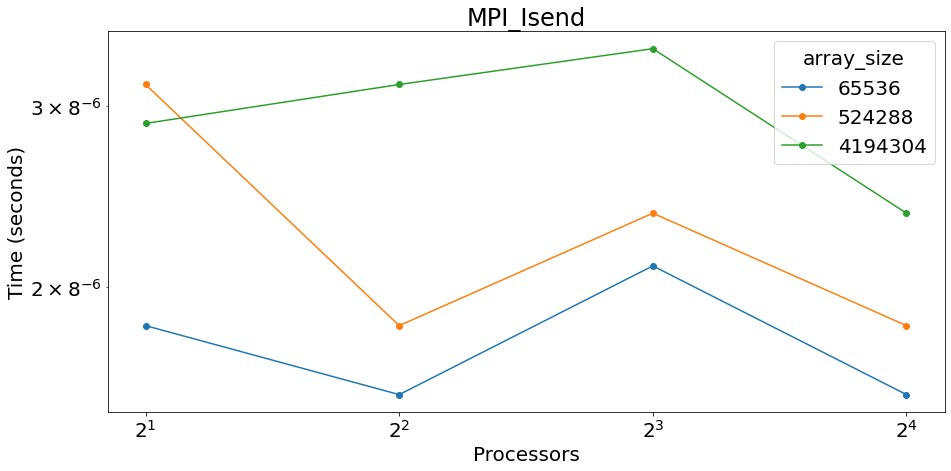

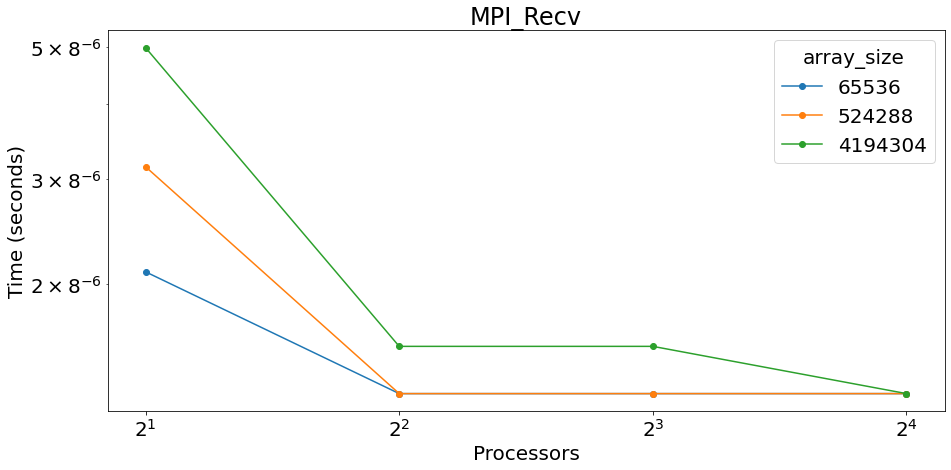

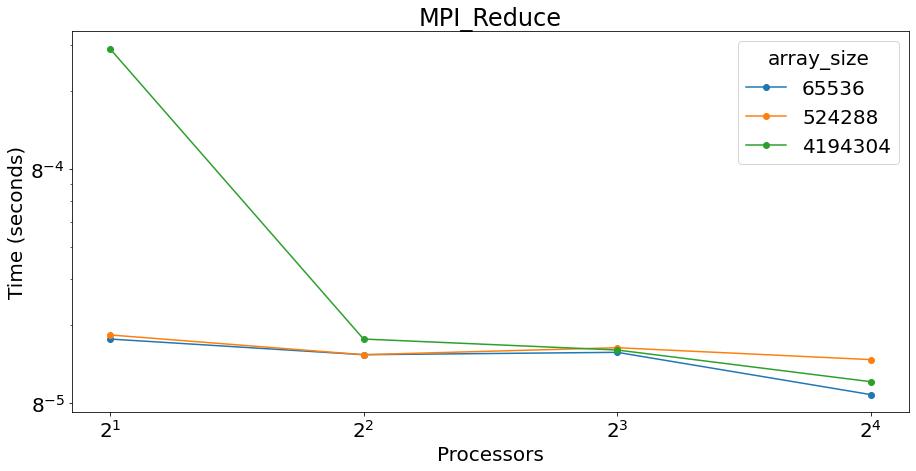

In [24]:
for node in tk.graph.traverse():
    plot_pandas(
        df=tk.dataframe.loc[node, "Min time/rank"].unstack(level="array_size"),
        title=node.frame["name"],
        xlabel="Processors",
        ylabel="Time (seconds)",
    )

Avg time graphs

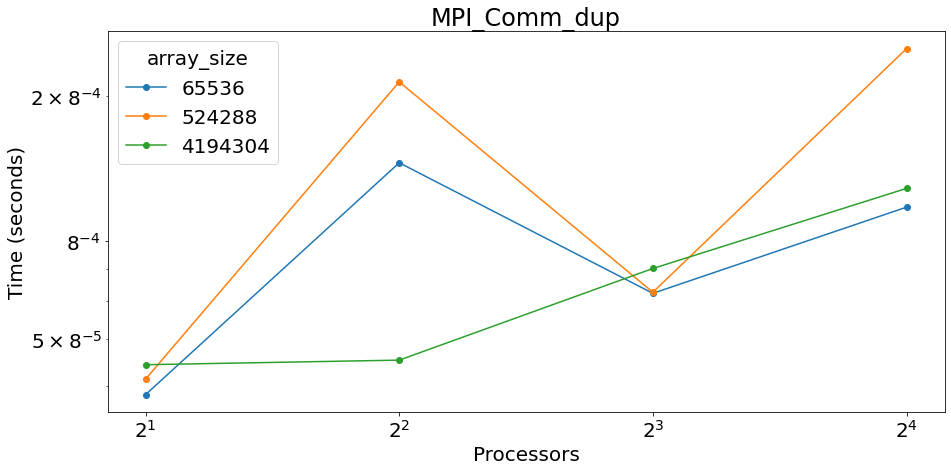

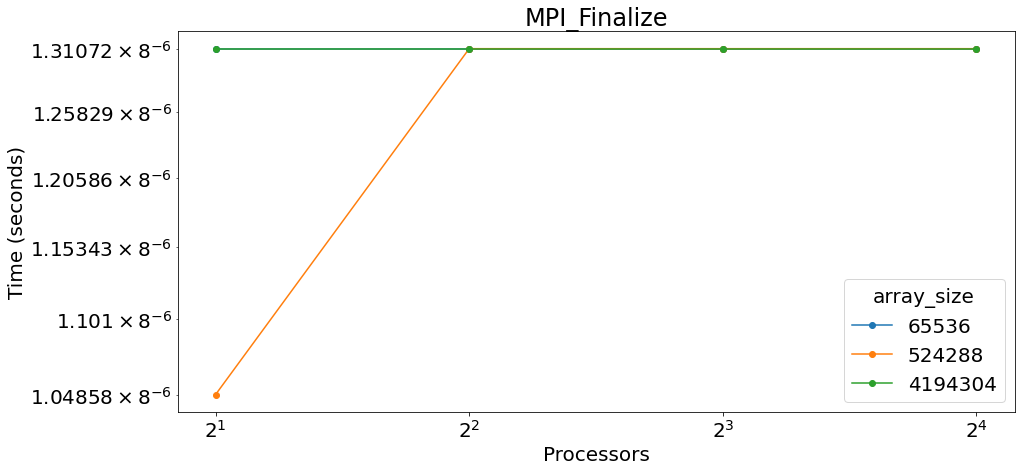

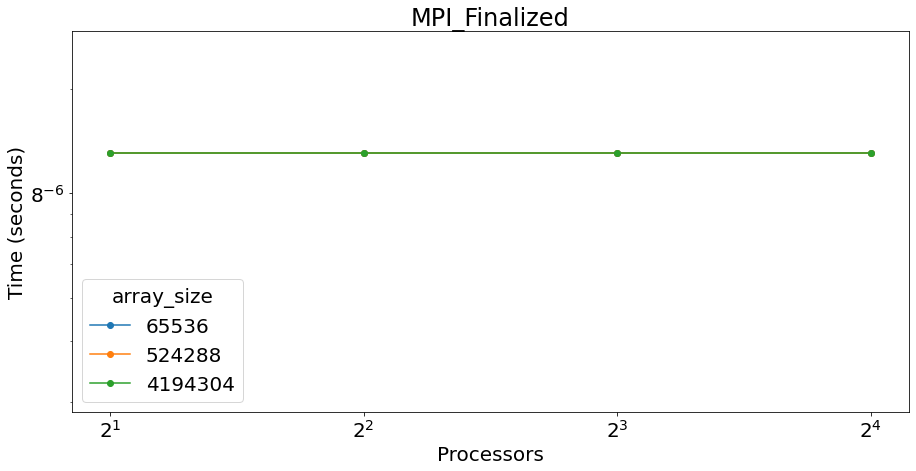

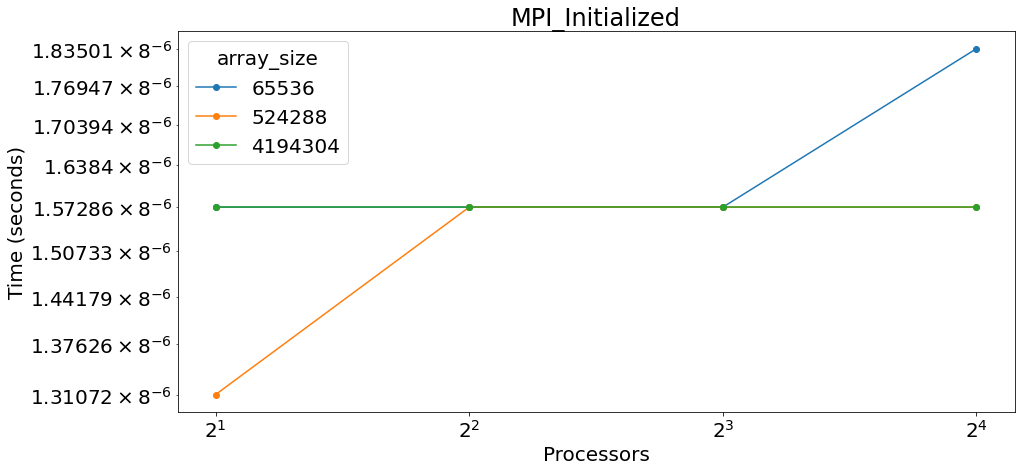

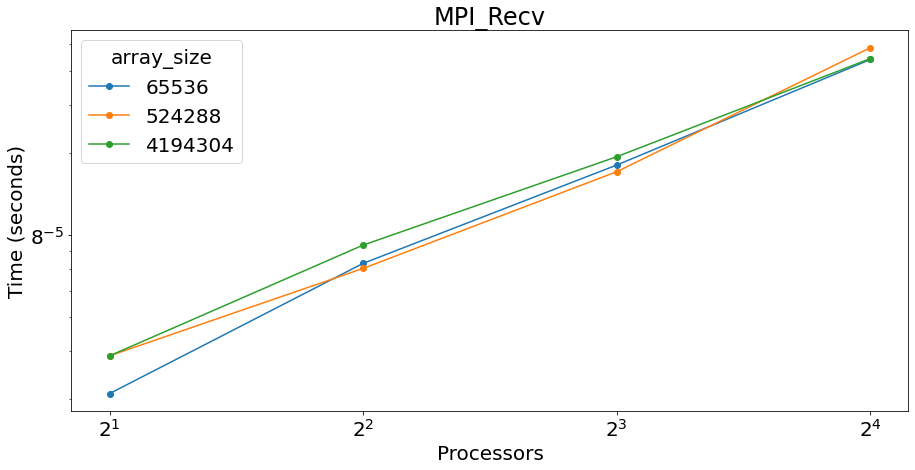

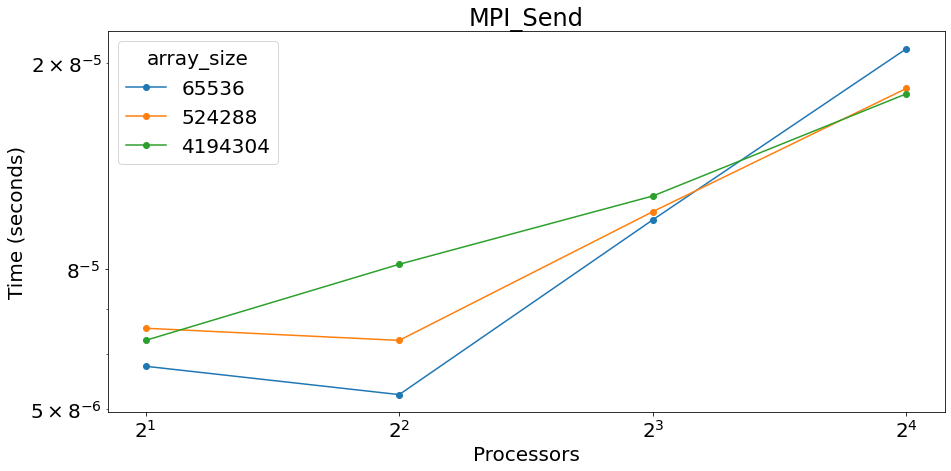

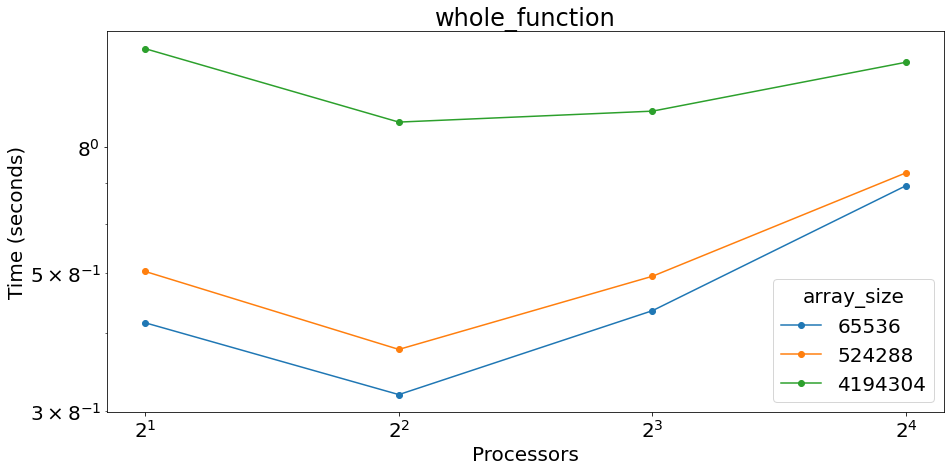

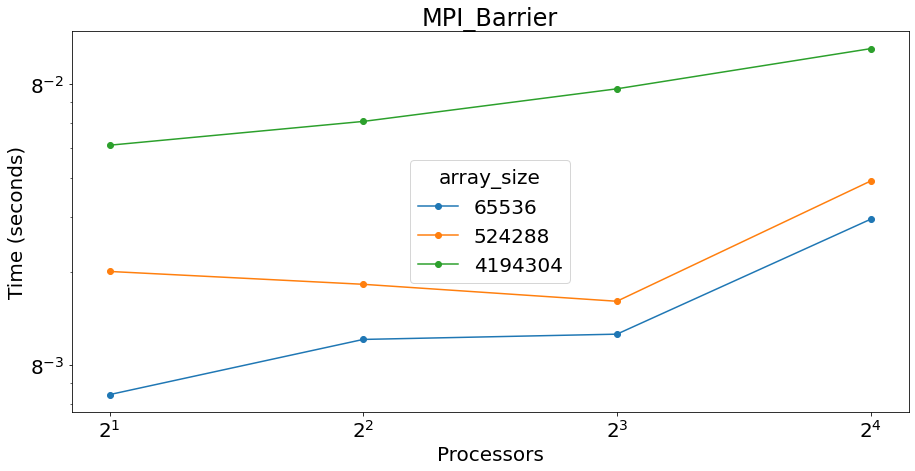

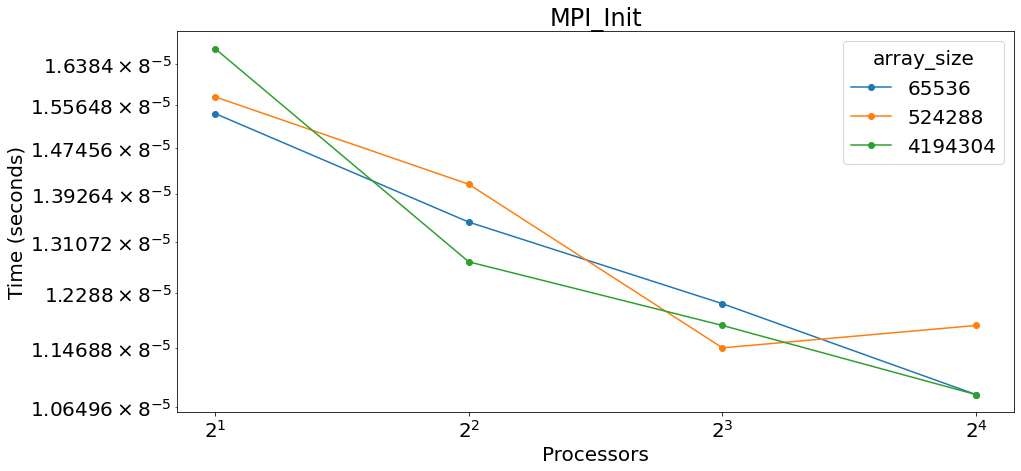

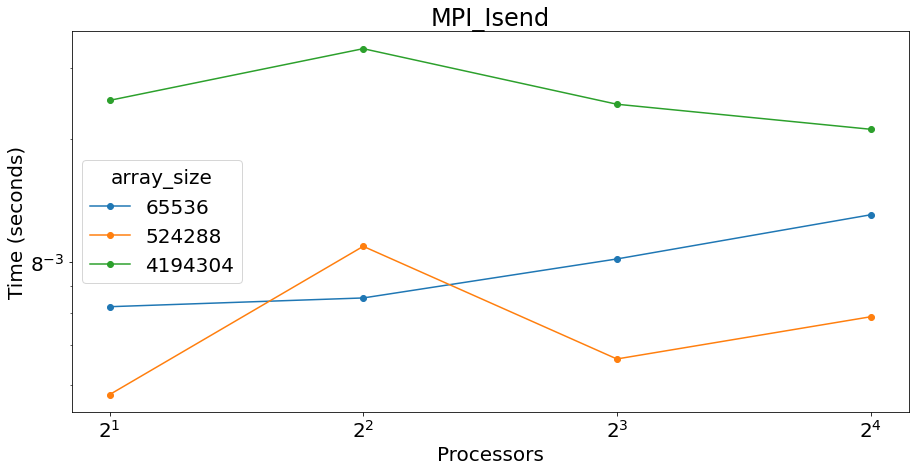

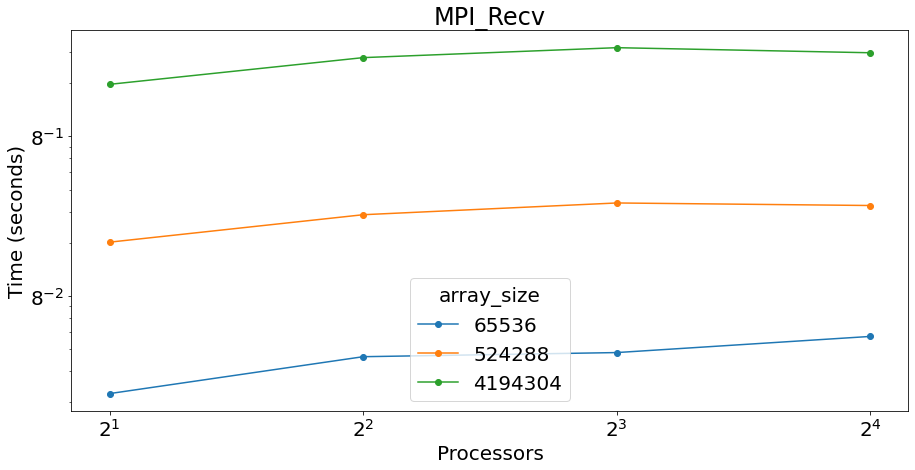

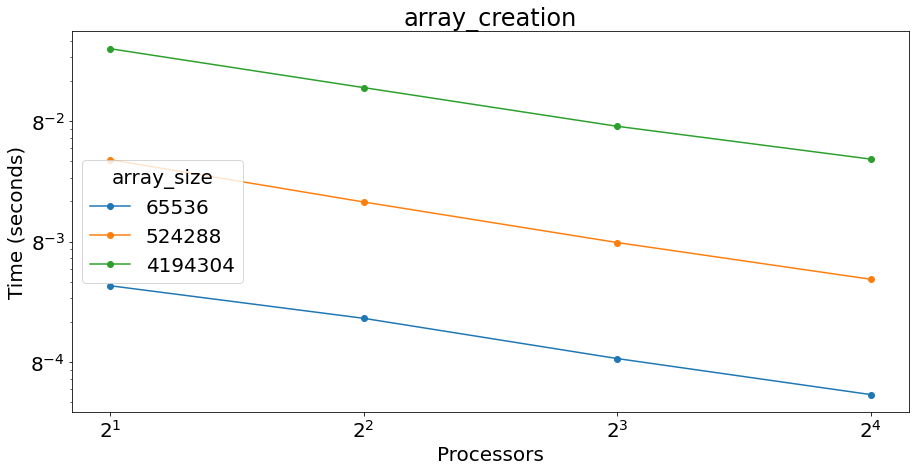

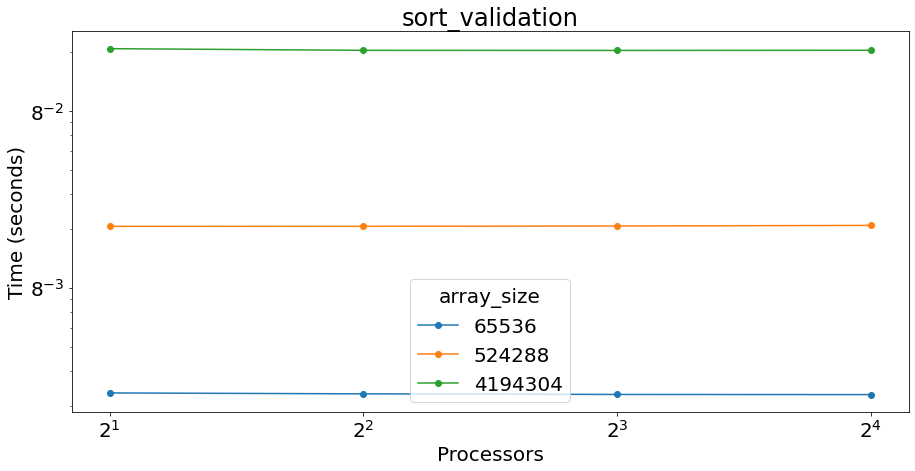

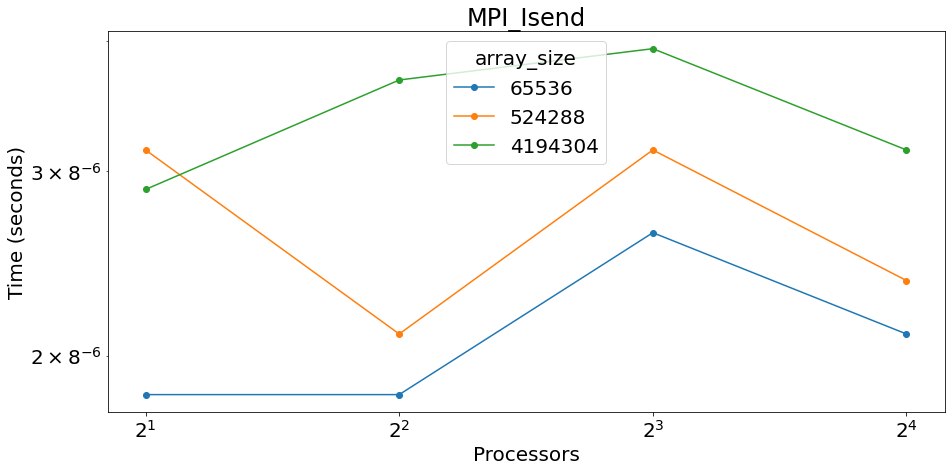

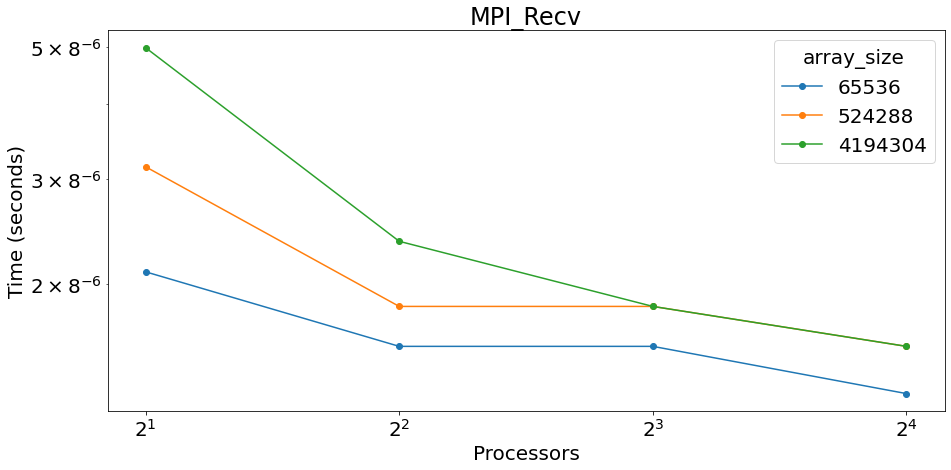

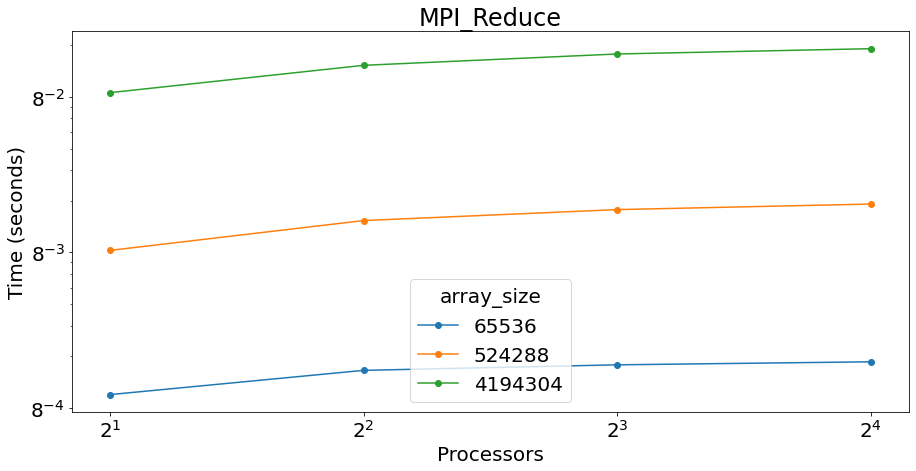

In [25]:
for node in tk.graph.traverse():
    plot_pandas(
        df=tk.dataframe.loc[node, "Avg time/rank"].unstack(level="array_size"),
        title=node.frame["name"],
        xlabel="Processors",
        ylabel="Time (seconds)",
    )